# Linear Regression
<li>Linear regression is a statistical practice of calculating a straight line that specifies a mathematical relationship between two variables.</li>
<li>Linear regression analysis is used to predict the value of a variable based on the value of another variable.</li>
<li>The variable you want to predict is called the dependent variable.</li>
<li>The variable you are using to predict the other variable's value is called the independent variable.</li>

<ol>
    <li>Simple Linear Regression</li>
    <li>Multiple Linear Regression</li>
</ol>

## 1. Simple Linear Regression
<li>Simple linear regression is a regression model that estimates the relationship between one independent and one dependent variable using a straight line.</li>
<li>Both variables should be quantitative.</li>

<li>The following equation is the general form of the simple linear regression model.</li>
<code>
    ^
    y =B0 + B1x1 
</code>
Where    
^
y represents the predicted value, 
x1 represents the feature column we choose to use in our model.
<li>These values are independent of the dataset.</li>
<li>On the other hand, B0 and B1 represent the parameter values that are specific to the dataset.</li>
<li>The goal of simple linear regression is to find the optimal B0 and B1 values that best describe the relationship between the feature and the target column.</li>


<li>The following diagram shows different simple linear regression models depending on the data:</li>

![](images/regression_figure.png)

<li>The first step is to select the feature x1, we want to use in our model.</li>
<li>Once we select this feature, we can use scikit-learn to determine the optimal parameter values B0 and B1 based on the training data.</li>


In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
path_to_advertising_data = os.path.join(os.path.dirname(os.getcwd()), 'csv_data', 'advertising.csv')

In [7]:
advertising_df = pd.read_csv(path_to_advertising_data)
print(advertising_df.shape)

(200, 4)


In [8]:
advertising_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### Data Preparation

In [9]:
data = advertising_df[["TV"]]
labels = advertising_df["Sales"]

In [10]:
print(data.shape)

(200, 1)


In [11]:
print(labels.shape)

(200,)


### Data Splitting

In [12]:
!pip install scikit-learn

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data, labels,
                                                   test_size=0.2, 
                                                    random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160,)
(40,)


In [15]:
from sklearn.linear_model import LinearRegression

## Creating linear regression objects

In [16]:
lr = LinearRegression()

## Fit the data into linear regression model

In [17]:
lr.fit(x_train, y_train)

LinearRegression()

In [18]:
lr.coef_

array([0.05548294])

In [19]:
lr.intercept_

7.007108428241848

In [20]:
predictions = lr.predict(x_test)

In [21]:
predictions

array([16.06747317, 17.84847567, 23.25806271,  7.65625887, 19.23000098,
       11.17387752, 19.03581067,  9.78125562, 19.34651516, 16.72217191,
        8.75482116, 10.12524988, 20.01785878,  7.30671633, 14.74697911,
       16.45030549,  7.41213392, 17.97053815, 11.18497411, 20.17875932,
       19.74044406, 10.76885203,  9.1154603 , 20.92777906, 10.83543156,
        9.97544593, 18.85271696, 14.73588252, 11.84522114,  7.47316516,
       18.09260063, 10.84652815, 18.04266598,  7.94477018, 22.58117079,
       20.22314567,  9.68693462, 22.19279018, 13.50970946,  8.53288939])

In [23]:
test_vs_pred_df = pd.DataFrame({"actual": y_test, 
                               "pred": predictions})
test_vs_pred_df

,actual,pred
95,16.9,16.067473
15,22.4,17.848476
30,21.4,23.258063
158,7.3,7.656259
128,24.7,19.230001
115,12.6,11.173878
69,22.3,19.035811
170,8.4,9.781256
174,16.5,19.346515
45,16.1,16.722172


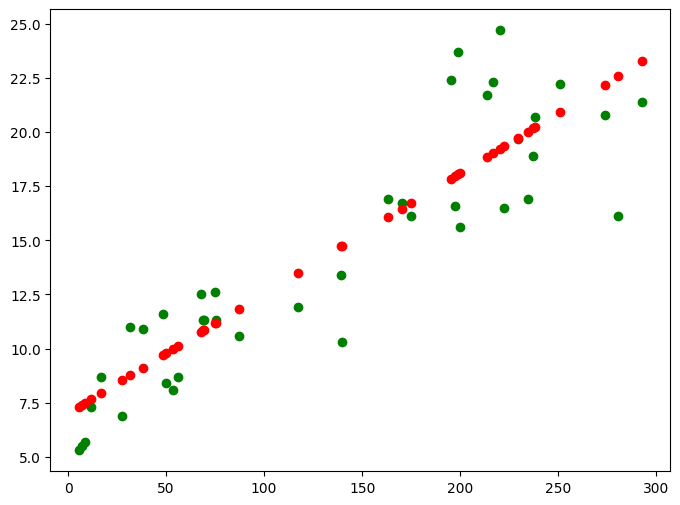

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(x=x_test["TV"], y=y_test, color="green")
plt.scatter(x=x_test["TV"], y=predictions, color = "red")
plt.show()

In [24]:
x_test

,TV
95,163.3
15,195.4
30,292.9
158,11.7
128,220.3
115,75.1
69,216.8
170,50.0
174,222.4
45,175.1


## Cost/Loss Function For Linear Regression

<li>Cost function measures the performance of a machine learning model for a data set.</li>
<li>Cost function quantifies the error between predicted and expected values and presents that error in the form of a single real number.</li>
<li>Depending on the problem, cost function can be formed in many different ways.</li>
<li>The purpose of cost function is to be either minimized or maximized.</li>
<li>For algorithms relying on gradient descent to optimize model parameters, every function has to be differentiable.</li>

![](images/cost_function.png)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
def adjr2(actual, predicted,n, d):
    """ R2 Score """
    return 1-(1-r2_score(actual,predicted))* (n-1)/(n-d-1)

In [29]:
print("MSE is", mean_squared_error(y_test, predictions))
print("RMSE is", mean_squared_error(y_test, predictions, squared=False))
print("MAE is", mean_absolute_error(y_test, predictions))
print("Rsquare is", r2_score(y_test, predictions))

MSE is 6.101072906773963
RMSE is 2.470035001123256
MAE is 1.9502948931650088
Rsquare is 0.802561303423698


In [34]:
print("Adjusted Rsquare is", adjr2(y_test, predictions, y_test.shape[0], 1))

Adjusted Rsquare is 0.7973655482506374


In [31]:
y_test.shape[0]

40

### Optimization (Using Gradient Descent)
<li>Gradient descent is an iterative optimization algorithm to find the minimum of a function. Here that function is our Loss Function.</li>

![](images/gradient_descent.jpg)


#### Steps For Finding Gradient Descent

![](images/gradient_descent_steps.png)

## Multiple Linear Regression

<li>A multiple linear regression model allows us to capture the relationship between multiple feature columns and the target column.</li>
<li>Here's what the formula looks like:
<code>
^
y = B0 + B1x1 + B2x2 + ... + Bnxn
</code>
      ^
<li>Where y represents the predicted value</li>
<li>B0, B1, B2,..., Bn represents n parameter values that are specific to the dataset.</li>
<li>The goal here is to find out the optimal values of B0, B1, B2 such that these features best represents the relationship between the data.</li>

![](images/multiple_linear_regression.png)

<li>The parameters values can be estimated using the following eqns:</li>

![](images/mle_eqn.png)

### Data Preparation

In [35]:
advertising_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [36]:
data = advertising_df.drop("Sales", axis=1)
labels = advertising_df["Sales"]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [38]:
mlr = LinearRegression()

In [39]:
mlr.fit(x_train, y_train)

LinearRegression()

In [40]:
mlr.coef_

array([0.05450927, 0.10094536, 0.00433665])

In [41]:
mlr.intercept_

4.714126402214129

In [42]:
predictions = mlr.predict(x_test)

In [43]:
print("MSE is", mean_squared_error(y_test, predictions))
print("RMSE is", mean_squared_error(y_test, predictions, squared=False))
print("MAE is", mean_absolute_error(y_test, predictions))
print("Rsquare is", r2_score(y_test, predictions))
print("Adjusted Rsquare is", adjr2(y_test, predictions, y_test.shape[0], 3))

MSE is 2.907756910271091
RMSE is 1.7052146229349228
MAE is 1.274826210954934
Rsquare is 0.9059011844150826
Adjusted Rsquare is 0.8980596164496728


### Performance Metrics In Linear Regression
<li>To evaluate the performance or quality of the model, different metrics are used, and these metrics are known as performance metrics or evaluation metrics.</li>
<li>Some of the performance metrics used in linear regression are:</li>
<ol>
    <b><li>Mean Absolute Error</li></b>
    <b><li>Mean Squared Error</li></b>
    <b><li>Root Mean Squared Error</li></b>
    <b><li>R²</li></b>
    <b><li>Adjuster R²</li></b>
</ol>

### Mean Absolute Error
<li>Absolute Error is the amount of error in your measurements. It is the difference between the measured value and “true” value.</li>
<li>For example, if a scale states 90 pounds but you know your true weight is 89 pounds, then the scale has an absolute error of 90 lbs – 89 lbs = 1 lbs.</li>
<li>In machine learning, mean absolute error is the average difference between the actual  values and the predicted values of the model.</li>
<li>MAE measures the average magnitude of the errors in a set of predictions, without considering their direction.</li>
<li>The formula to calculate MAE is given by:</li>

![](images/mae.png)



### Mean Squared Error
<li>In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors.</li>
<li>The mean squared error (MSE) tells you how close a regression line is to a set of points.</li>
<li>It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.</li>
<li>The squaring is necessary to remove any negative signs. It also gives more weight to larger differences.</li>
<li>It’s called the mean squared error as you’re finding the average of a set of errors.</li>
<li>The lower the MSE, the better the forecast.</li>
<li>In machine learning, mean squared error is the average difference between the squares of actual values and the predicted values.</li>
<li>The formula to calculate mean squared error is given by:</li>

![](images/mse.png)



### Root Mean Squared Error
<li>RMSE is a quadratic scoring rule that also measures the average magnitude of the error.</li>
<li>It’s the square root of the average of squared differences between prediction and actual observation.</li>
<li>The formula to calculate RMSE is given by:</li>

![](images/rmse.png)



### R²
<li>R-Squared determines the proportion of variance in the dependent variable that can be explained by the independent variable.</li>
<li>In other words, r-squared shows how well the data fit the regression model (the goodness of fit).</li>
<li>R-squared measures the strength of the relationship between your model and the dependent variable on a scale of 0 – 1.</li>
</li>Usually, the larger the R2, the better the regression model fits your observations.</li>
<li>The formula to calculate R2 is given by:</li>

![](images/r2_score.png)

<li>But sometimes, small R-squared values are not always a problem, and high R-squared values are not necessarily good.</li>


![](images/r2_range.png)

![](images/r2_problems.png)

### Adjusted R2
<li>Adjusted R2 is a corrected goodness-of-fit (model accuracy) measure for linear models.</li>
<li>Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.</li>
<li>The adjusted R-squared increases when the new term improves the model more than would be expected by chance.</li>
<li>It decreases when a predictor improves the model by less than expected.</li>

![](images/r2_adjusted.png)

### Bias Variance TradeOffs In Machine Learning

![](images/bias_variance_tradeoff.png)

### Regularization In Regression

<li>During the Machine Learning model building, the Regularization Techniques is an unavoidable and important step to improve the model.</li>
<li>This is also called the Shrinkage method in which we use to add the penalty term to control the complex model to avoid overfitting by reducing the variance.</li>
<li>In regression, we can came across overfitted model where the best fit line works best for the training dataset but fails for testing datasets.</li>
<li>To prevent from such overfitting problem, we have two different methods in regression. They are :</li>
<ol>
    <b><li>Lasso Regression</li></b>
    <b><li>Ridge Regression</li></b>



### 1. Lasso Regression

<li>Lasso Regression is also called as L1 regularization technique.</li>
<li>We can use lasso regression for feature selection as well because the beta coefficients can be shrinked down to 0 incase of lasso regression.</li>
<li>In lasso regression, we add the absolute values of the regression coefficients as a penalty term to reduce overfitting.</li>
<li>The formula to calculate lasso regression is given by:</li>


![](images/lasso_regression.png)

![](images/lasso.png)

### 2. Ridge Regession

<li>Ridge Regression is also called as L2 regularization technique.</li>
<li>We can not use ridge regression for feature selection as well because the beta coefficients can only be shrinked down to lower values but not 0.</li>
<li>In ridge regression, we add the squared values of the regression coefficients as a penalty term to reduce overfitting.</li>
<li>The formula to calculate ridge regression is given by:</li>

![](images/ridge_regression.png)

![](images/ridge.png)